# Project 3 - Predicting the Age of Abalone
## SL - Classification Regressions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data Preprocessing

In [2]:
# Read in unscaled version of the dataset
unscaled_df = pd.read_csv('./Dataset/abalone_unscaled_data.csv')
unscaled_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [3]:
unscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   int64  
 2   Diameter        4177 non-null   int64  
 3   Height          4177 non-null   int64  
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 326.5+ KB


In [4]:
orig_df = unscaled_df.copy()

In [5]:
# Label Encode the categorical "Sex" column
# Note: Female => 0
#       Infant => 1
#       Male   => 2
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
unscaled_df['Sex_LabelEncoded'] = le.fit_transform(unscaled_df['Sex'])
unscaled_df.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded
0,M,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2
1,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2
2,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0
3,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2
4,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1


In [6]:
# Binary encode the categorical "Sex" column
unscaled_df = pd.get_dummies(unscaled_df, prefix=['Sex'], columns=['Sex'])
unscaled_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Sex_LabelEncoded,Sex_F,Sex_I,Sex_M
0,91,73,19,102.8,44.9,20.2,30.0,15,16.5,2,0,0,1
1,70,53,18,45.1,19.9,9.7,14.0,7,8.5,2,0,0,1
2,106,84,27,135.4,51.3,28.3,42.0,9,10.5,0,1,0,0
3,88,73,25,103.2,43.1,22.8,31.0,10,11.5,2,0,0,1
4,66,51,16,41.0,17.9,7.9,11.0,7,8.5,1,0,1,0


In [7]:
# Reorganize columns
column_order = ["Sex_LabelEncoded", "Sex_M", "Sex_F", "Sex_I", "Length", 
                "Diameter", "Height", "Whole_weight", "Shucked_weight", 
                "Viscera_weight", "Shell_weight", "Rings", "Age"]
unscaled_df = unscaled_df.reindex(columns=column_order)
unscaled_df.head()

,Sex_LabelEncoded,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,1,0,0,91,73,19,102.8,44.9,20.2,30.0,15,16.5
1,2,1,0,0,70,53,18,45.1,19.9,9.7,14.0,7,8.5
2,0,0,1,0,106,84,27,135.4,51.3,28.3,42.0,9,10.5
3,2,1,0,0,88,73,25,103.2,43.1,22.8,31.0,10,11.5
4,1,0,0,1,66,51,16,41.0,17.9,7.9,11.0,7,8.5


In [8]:
# Binning the Rings column
unscaled_df['Rings_Bin']=pd.cut(unscaled_df['Rings'], bins=6, labels=False)

In [9]:
# Display the cross-reference between Rings and Rings_Bin
xref_df = unscaled_df.copy()
xref_df = xref_df[["Rings", "Rings_Bin"]]
xref_df.drop_duplicates().sort_values(by=['Rings'])


,Rings,Rings_Bin
236,1,0
719,2,0
237,3,0
44,4,0
42,5,0
48,6,1
1,7,1
5,8,1
2,9,1
3,10,1


## Choose your X and y

In [264]:
# Determine X using Sex LabelEncoded
X = unscaled_df[['Sex_LabelEncoded', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]


In [301]:
# Determine X using Sex BinaryEncoded
X = unscaled_df[['Sex_M', 'Sex_F', 'Sex_I', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]


In [302]:
# Determine y without Rings_Bin
y = unscaled_df["Rings"].values.reshape(-1,1)


In [312]:
# Determine y WITH Rings_Bin
y = unscaled_df["Rings_Bin"].values.reshape(-1,1)


## Choose your Train-Test-Split

In [313]:
# Without Stratify
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [322]:
# WITH Stratfiy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Choose your Scaler

In [323]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [325]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [327]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler().fit(X_train)
#y_scaler = RobustScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [329]:
from sklearn.preprocessing import PowerTransformer

X_scaler = PowerTransformer().fit(X_train)
#y_scaler = PowerTransformer().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

## Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train.ravel())


LogisticRegression(max_iter=1000)

In [147]:
# Display Actual vs Predicted values
y_pred = model.predict(X_test_scaled)
act_v_pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
act_v_pred_df

,Actual,Predicted
0,2,2
1,1,1
2,1,1
3,2,2
4,1,1
...,...,...
1040,1,2
1041,2,1
1042,2,1
1043,1,1


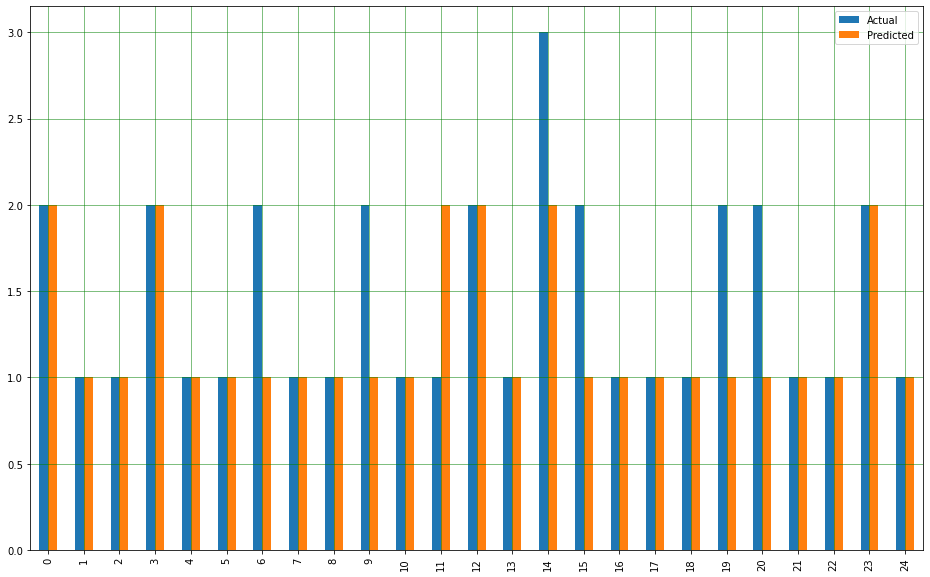

In [148]:
act_v_pred_plot_df = act_v_pred_df.head(25)
act_v_pred_plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [149]:
# Display model scores
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7091315453384419
Testing Data Score: 0.6832535885167464


In [118]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm

cm(y_test,y_pred).ravel()

array([ 33,  25,   0,   0,   0,   4, 562,  75,   0,   0,   0, 174, 108,
         0,   0,   0,  14,  36,   0,   0,   0,   4,  10,   0,   0])

## RandomForest Classifier

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())

In [202]:
# Display model scores
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6947368421052632


In [174]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.19180484197977496, 'Shell_weight'),
 (0.15824848671654423, 'Shucked_weight'),
 (0.1490047402799476, 'Whole_weight'),
 (0.1445493226902357, 'Viscera_weight'),
 (0.11035195605919235, 'Height'),
 (0.10837469826710718, 'Length'),
 (0.10642700976032908, 'Diameter'),
 (0.031238944246868988, 'Sex_LabelEncoded')]

In [180]:
# Display Actual vs Predicted values
y_pred = rf.predict(X_test)
act_v_pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
act_v_pred_df

,Actual,Predicted
0,2,2
1,1,1
2,1,2
3,2,2
4,1,1
...,...,...
1040,1,2
1041,2,2
1042,2,2
1043,1,1


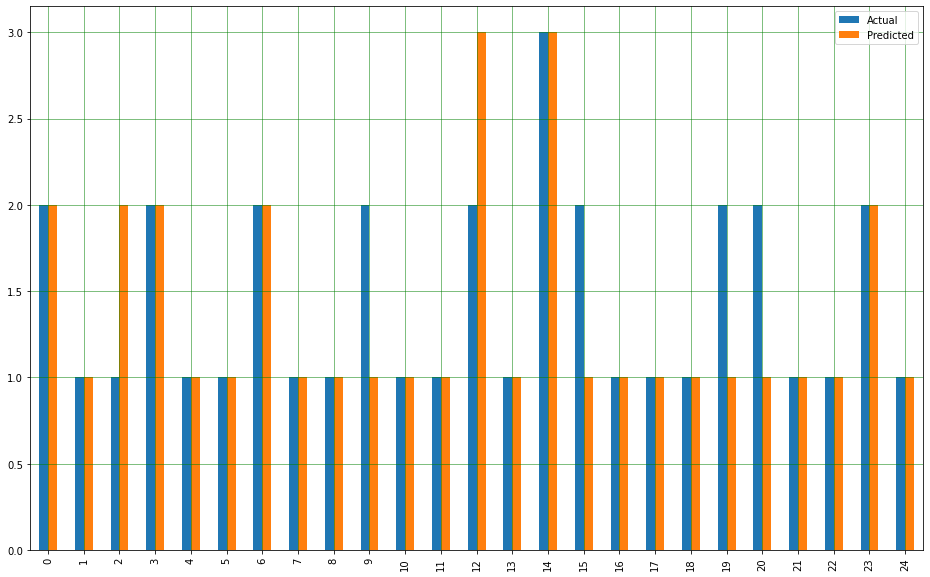

In [181]:
act_v_pred_plot_df = act_v_pred_df.head(25)
act_v_pred_plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## KNN Classifier

k: 1, Train/Test Score: 1.000/0.612
k: 3, Train/Test Score: 0.793/0.666
k: 5, Train/Test Score: 0.753/0.678
k: 7, Train/Test Score: 0.739/0.689
k: 9, Train/Test Score: 0.729/0.681
k: 11, Train/Test Score: 0.721/0.693
k: 13, Train/Test Score: 0.718/0.691
k: 15, Train/Test Score: 0.721/0.688
k: 17, Train/Test Score: 0.725/0.696
k: 19, Train/Test Score: 0.723/0.700


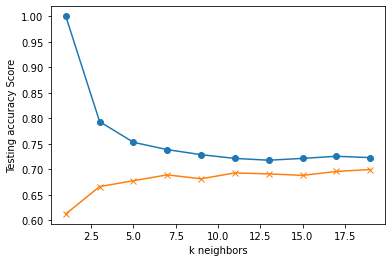

In [299]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## SVM Classifier

In [330]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train.ravel())
# Model Accuracy
print('Training Acc: %.3f' % model.score(X_train_scaled, y_train))
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Training Acc: 0.714
Test Acc: 0.694


In [331]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00       636
           2       0.16      0.29      0.20       297
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        14
           5       0.00      1.00      0.00         1

    accuracy                           0.08      1045
   macro avg       0.03      0.21      0.03      1045
weighted avg       0.04      0.08      0.06      1045



/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
